# 数据准备与清洗

In [2]:
import pandas as pd

# 读取数据
file_path = './朝阳医院2018年销售数据.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   购药时间    6576 non-null   object 
 1   社保卡号    6576 non-null   float64
 2   商品编码    6577 non-null   float64
 3   商品名称    6577 non-null   object 
 4   销售数量    6577 non-null   float64
 5   应收金额    6577 non-null   float64
 6   实收金额    6577 non-null   float64
dtypes: float64(5), object(2)
memory usage: 359.9+ KB


In [4]:
df.describe()

,社保卡号,商品编码,销售数量,应收金额,实收金额
count,6.576000e+03,6.577000e+03,6577.000000,6577.000000,6577.000000
mean,6.091254e+09,1.015869e+06,2.386194,50.473803,46.317510
std,4.889284e+09,5.131153e+05,2.375202,87.595925,80.976702
min,1.616528e+06,2.367010e+05,-10.000000,-374.000000,-374.000000
25%,1.014234e+08,8.614560e+05,1.000000,14.000000,12.320000
50%,1.001650e+10,8.615070e+05,2.000000,28.000000,26.600000
75%,1.004882e+10,8.690690e+05,2.000000,59.600000,53.000000
max,1.283612e+10,2.367012e+06,50.000000,2950.000000,2650.000000


In [5]:
# 处理日期字段，确保日期格式正确
df['购药时间'] = pd.to_datetime(df['购药时间'].str.split().str[0], errors='coerce')

# 检查是否存在无效日期
invalid_dates = df[df['购药时间'].isnull()]

# 删除无效的日期数据
df = df.dropna(subset=['购药时间'])

# 检查是否存在重复值，并去重
df = df.drop_duplicates()

# 输出清洗后的数据概况
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6553 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   购药时间    6553 non-null   datetime64[ns]
 1   社保卡号    6552 non-null   float64       
 2   商品编码    6553 non-null   float64       
 3   商品名称    6553 non-null   object        
 4   销售数量    6553 non-null   float64       
 5   应收金额    6553 non-null   float64       
 6   实收金额    6553 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 409.6+ KB
None


# 探索性数据分析（EDA）

In [17]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载用户提供的中文字体
font_path = 'C:/Windows/Fonts/simhei.ttf'
chinese_font = FontProperties(fname=font_path)

# 确保字体应用在每个图表中
plt.rcParams['font.family'] = chinese_font.get_name()

a. 卖得最好/最差的药品

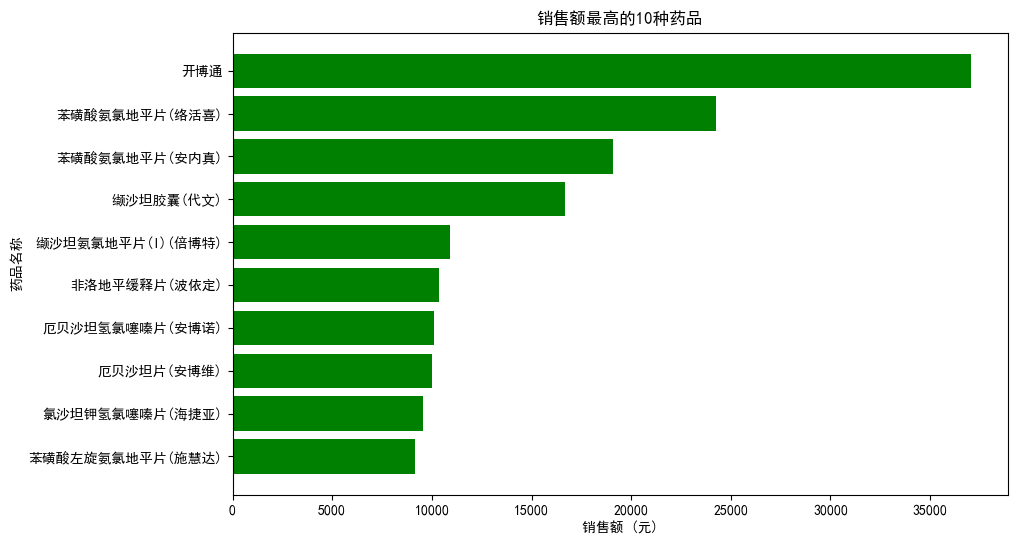

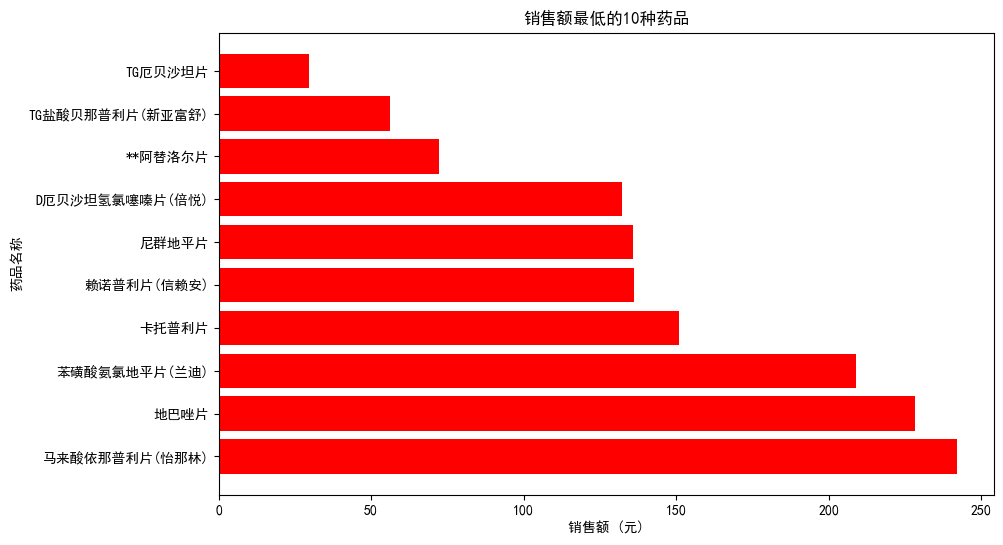

In [19]:
import matplotlib.pyplot as plt

# 根据销售数量和实收金额分析最畅销的药品
df_grouped = df.groupby('商品名称').agg({'销售数量': 'sum', '实收金额': 'sum'}).reset_index()

# 销售额最高的10种药品
best_selling = df_grouped.sort_values(by='实收金额', ascending=False).head(10)

# 销售额最低的10种药品
worst_selling = df_grouped.sort_values(by='实收金额').head(10)

# 可视化 - 销售额最高的10种药品
plt.figure(figsize=(10, 6))
plt.barh(best_selling['商品名称'], best_selling['实收金额'], color='green')
plt.title('销售额最高的10种药品')
plt.xlabel('销售额 (元)')
plt.ylabel('药品名称')
plt.gca().invert_yaxis()
plt.show()

# 可视化 - 销售额最低的10种药品
plt.figure(figsize=(10, 6))
plt.barh(worst_selling['商品名称'], worst_selling['实收金额'], color='red')
plt.title('销售额最低的10种药品')
plt.xlabel('销售额 (元)')
plt.ylabel('药品名称')
plt.gca().invert_yaxis()
plt.show()

b. 整体销售额的时间变化趋势

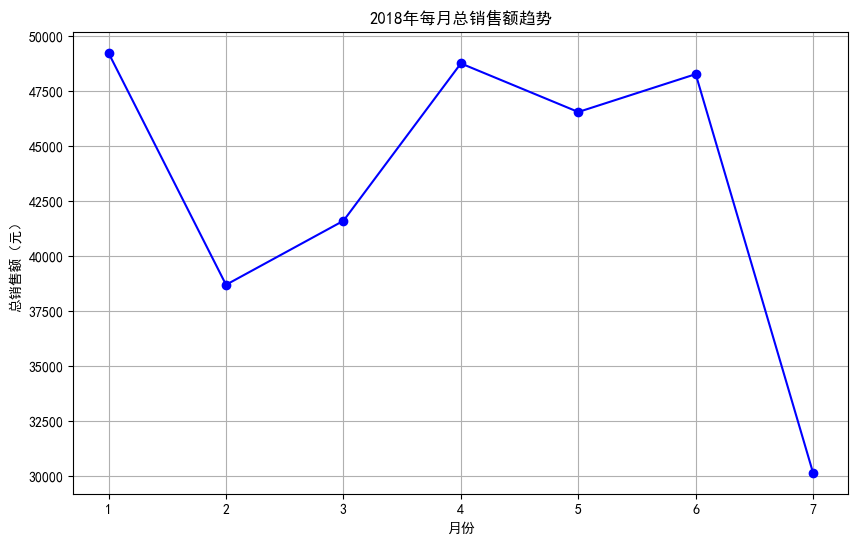

In [20]:
# 创建月份字段
df['月份'] = df['购药时间'].dt.month

# 计算每个月的总销售额
monthly_sales = df.groupby('月份').agg({'实收金额': 'sum'}).reset_index()

# 可视化 - 销售额趋势图
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['月份'], monthly_sales['实收金额'], marker='o', linestyle='-', color='blue')
plt.title('2018年每月总销售额趋势')
plt.xlabel('月份')
plt.ylabel('总销售额（元）')
plt.grid(True)
plt.show()

c. 各月份卖得最好的药品

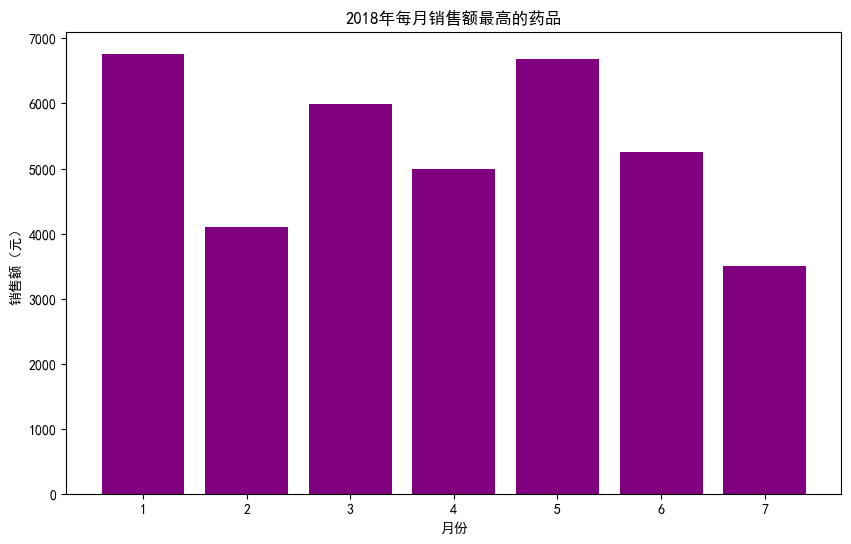

In [28]:
# 按月份和商品名称分组，计算每个药品在每个月的销售额
monthly_best_selling = df.groupby(['月份', '商品名称']).agg({'实收金额': 'sum'}).reset_index()

# 对每个月的药品按销售额排序，获取每月销售额最高的药品
monthly_best_selling = monthly_best_selling.sort_values(['月份', '实收金额'], ascending=[True, False])

# 每个月份的最佳药品
#monthly_best = monthly_best_selling.groupby('月份').first().reset_index()
monthly_best = monthly_best_selling.groupby('月份').first().reset_index()

# 可视化 - 每月销售额最高的药品
plt.figure(figsize=(10, 6))
plt.bar(monthly_best['月份'], monthly_best['实收金额'], color='purple')
plt.title('2018年每月销售额最高的药品')
plt.xlabel('月份')
plt.ylabel('销售额（元）')
plt.show()

# 特征工程与相关性分析

a. 分析工作日与周末的销售差异

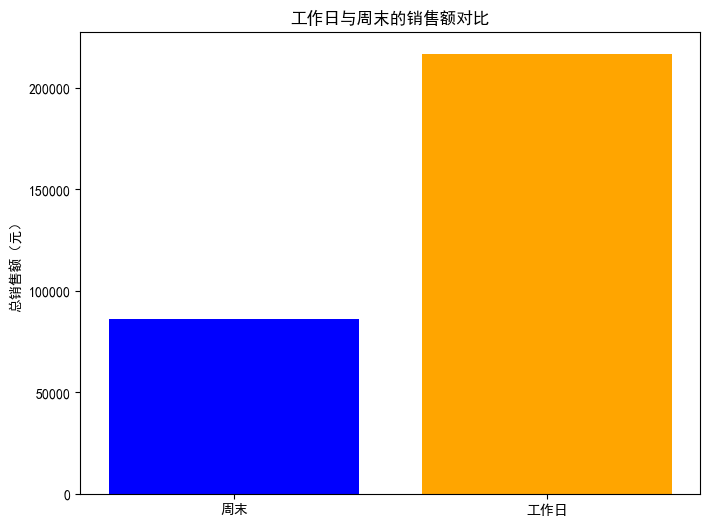

In [22]:
# 添加工作日标记
df['是否工作日'] = df['购药时间'].dt.dayofweek < 5

# 计算工作日和周末的总销售额
sales_by_weekday = df.groupby('是否工作日').agg({'实收金额': 'sum', '销售数量': 'sum'}).reset_index()

# 可视化 - 工作日与周末的销售额差异
plt.figure(figsize=(8, 6))
plt.bar(sales_by_weekday['是否工作日'].map({True: '工作日', False: '周末'}), sales_by_weekday['实收金额'], color=['blue', 'orange'])
plt.title('工作日与周末的销售额对比')
plt.ylabel('总销售额（元）')
plt.show()

b. 社保卡使用情况对销售的影响

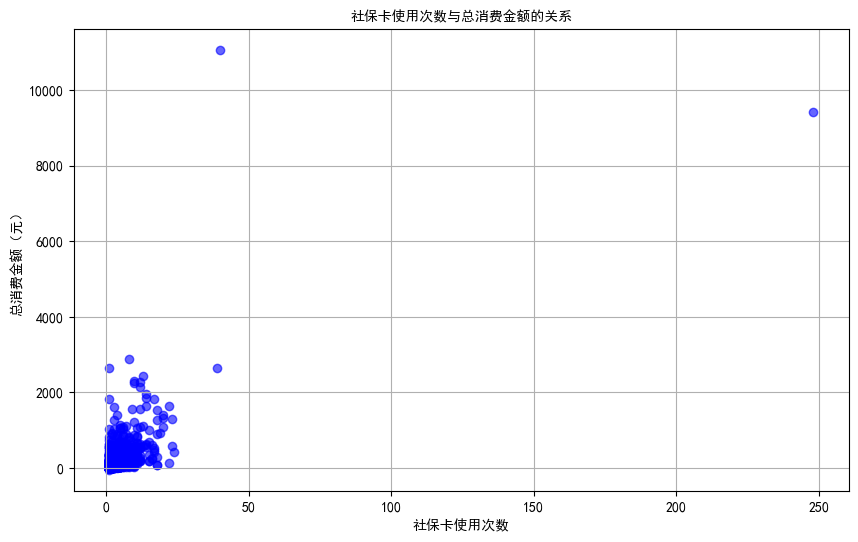

In [30]:
# 按社保卡号分组，计算每个社保卡号的使用次数和对应的总消费金额
social_security_analysis = df.groupby('社保卡号').agg({'实收金额': 'sum', '社保卡号': 'count'}).rename(columns={'社保卡号': '使用次数'}).reset_index()

# 可视化 - 社保卡使用次数与总消费金额的关系
plt.figure(figsize=(10, 6))
plt.scatter(social_security_analysis['使用次数'], social_security_analysis['实收金额'], color='blue', alpha=0.6)
plt.title('社保卡使用次数与总消费金额的关系', fontproperties=chinese_font)
plt.xlabel('社保卡使用次数', fontproperties=chinese_font)
plt.ylabel('总消费金额（元）', fontproperties=chinese_font)
plt.grid(True)
plt.show()

展示药品销量分布

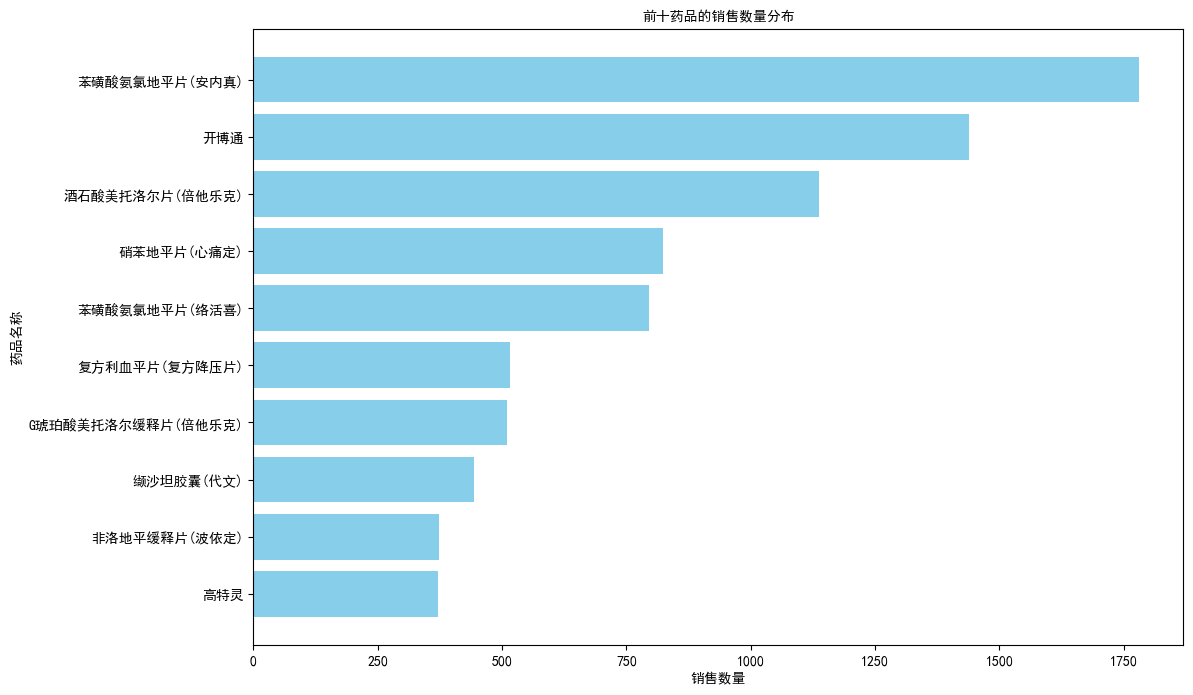

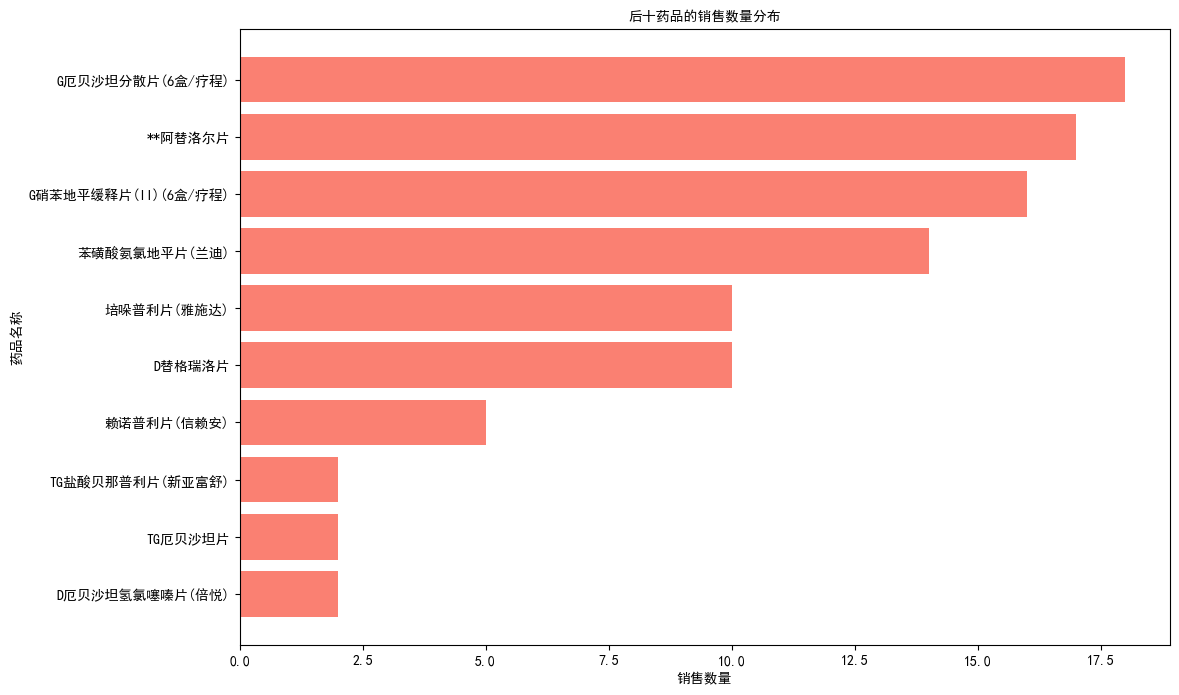

In [36]:
# 统计每种药品的销售数量
sales_by_product = df.groupby('商品名称').agg({'销售数量': 'sum'}).reset_index()

# 按销量排序
sales_by_product = sales_by_product.sort_values(by='销售数量', ascending=False)

# 取前十销量最高的药品
top_10_products = sales_by_product.head(10)

# 取后十销量最低的药品
bottom_10_products = sales_by_product.tail(10)

# 可视化 - 前十药品的销售数量分布（条形图）
plt.figure(figsize=(12, 8))
plt.barh(top_10_products['商品名称'], top_10_products['销售数量'], color='skyblue')
plt.title('前十药品的销售数量分布', fontproperties=chinese_font)
plt.xlabel('销售数量', fontproperties=chinese_font)
plt.ylabel('药品名称', fontproperties=chinese_font)
plt.gca().invert_yaxis()  # 反转Y轴，药品从上往下排列
plt.show()

# 可视化 - 后十药品的销售数量分布（条形图）
plt.figure(figsize=(12, 8))
plt.barh(bottom_10_products['商品名称'], bottom_10_products['销售数量'], color='salmon')
plt.title('后十药品的销售数量分布', fontproperties=chinese_font)
plt.xlabel('销售数量', fontproperties=chinese_font)
plt.ylabel('药品名称', fontproperties=chinese_font)
plt.gca().invert_yaxis()  # 反转Y轴，药品从上往下排列
plt.show()


# 数据可视化

数值型数据的相关性分析（相关系数矩阵）

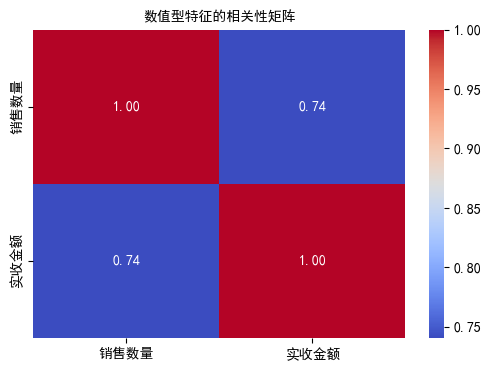

In [33]:
# 选择数值型特征进行相关性分析
numerical_features = df[['销售数量', '实收金额']]

# 计算相关性矩阵
correlation_matrix = numerical_features.corr()

# 可视化相关性矩阵
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('数值型特征的相关性矩阵', fontproperties=chinese_font)
plt.show()


时间因素与销售的相关性

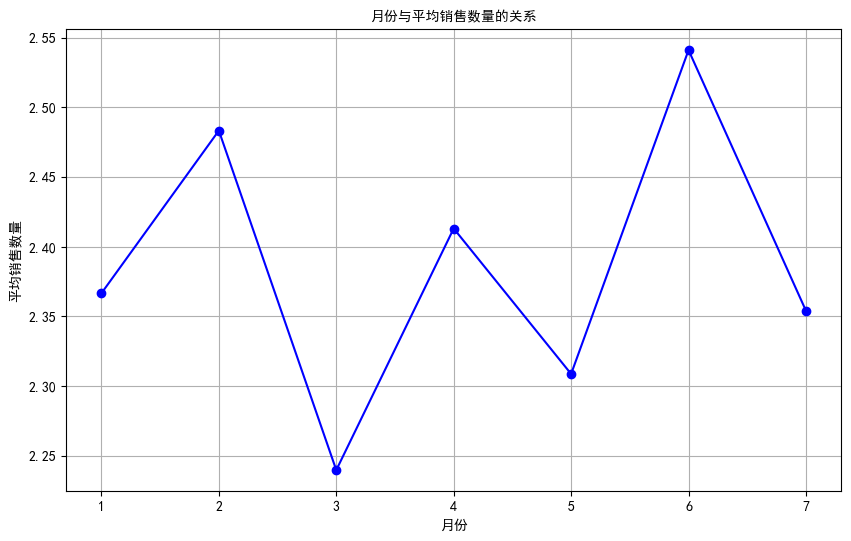

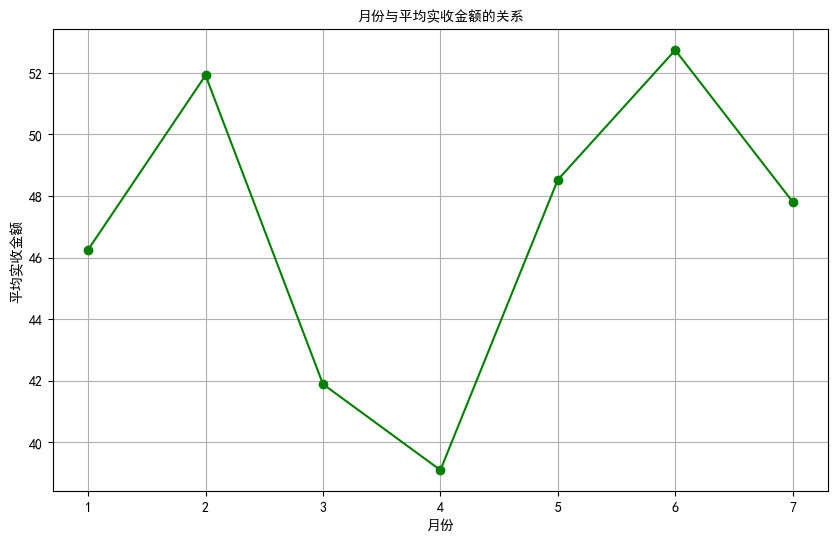

In [35]:
# 提取月份字段
df['月份'] = df['购药时间'].dt.month

# 按月份分组，计算平均销售数量和实收金额
time_correlation = df.groupby('月份').agg({'销售数量': 'mean', '实收金额': 'mean'}).reset_index()

# 可视化 - 月份与销售数量的关系
plt.figure(figsize=(10, 6))
plt.plot(time_correlation['月份'], time_correlation['销售数量'], marker='o', linestyle='-', color='blue')
plt.title('月份与平均销售数量的关系', fontproperties=chinese_font)
plt.xlabel('月份', fontproperties=chinese_font)
plt.ylabel('平均销售数量', fontproperties=chinese_font)
plt.grid(True)
plt.show()

# 可视化 - 月份与实收金额的关系
plt.figure(figsize=(10, 6))
plt.plot(time_correlation['月份'], time_correlation['实收金额'], marker='o', linestyle='-', color='green')
plt.title('月份与平均实收金额的关系', fontproperties=chinese_font)
plt.xlabel('月份', fontproperties=chinese_font)
plt.ylabel('平均实收金额', fontproperties=chinese_font)
plt.grid(True)
plt.show()
